<hr size="4" color="blue">
<p style="text-align: center;"><span style="color: #0000ff;"><font size="+5"><strong> Mise en forme

<hr size="4" color="blue">

# 1) Généralité


Le nettoyage de données est l'opération de détection et de correction (ou suppression) d'erreurs présentes sur des données stockées dans des bases de données ou dans des fichiers.

Le nettoyage de données est un des problèmes majeurs des entrepôts de données.

Les données présentes dans les bases de données peuvent avoir plusieurs types d'erreurs comme des erreurs de frappe, des informations manquantes, des imprécisions etc. La partie impropre de la donnée traitée peut être remplacée, modifiée ou supprimée. Le processus de nettoyage identifie les données erronées et les corrige automatiquement avec un programme informatique ou les propose à un humain pour qu'il effectue les modifications.

Les approches classiques de nettoyage utilisent les contraintes d'intégrité, les statistiques ou l'apprentissage automatique pour nettoyer les données. 

Problématique

Des données incorrectes ou incohérentes peuvent conduire à de fausses conclusions et à de mauvaises prises de décision.

Types d'erreurs :

- Les ***erreurs sur les données*** peuvent être de toutes sortes. Par exemple, une erreur peut apparaître lors d'une saisie (donnée manquante, données dupliquées, erreur de saisie, mauvais format, etc.)

- ***Donnée manquante*** Ce type d'erreur provient lorsqu'une donnée est vide ou manquante.

- Erreurs de duplication Les erreurs de duplication surviennent lorsque plusieurs occurrences de la même donnée sont stockées.

- Une erreur lexicale est une divergence entre le nom de la donnée attendu et le ***format*** spécifié.

- Les erreurs de contradiction sont des contradictions dans les données.

- Erreurs de donnée invalide Ce sont des entrées qui sont dites invalides mais qui ne sont pas détectables par la mise en place de contraintes. Ce sont des erreurs qui sont spécifiques au domaine.



# import des modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale
from datetime import datetime
import warnings
warnings.simplefilter("ignore")#, UserWarning
import datetime

# import de la série simulé 

In [2]:
Names=['Times','Pression']
Type ={'Pression': float}#,dtype=Type
dfSimu=pd.read_csv('Data/Simulate/SimulatedStationnaire.csv',header=0,skiprows=0, parse_dates=['Times'],names=Names,index_col=0)

In [3]:
dfSimuNan=dfSimu
dfSimuNan.iloc[4]=np.nan

In [4]:
rep="Data/Simulate/SimulatedOutlier.csv"
dfOutlier=pd.read_csv(rep,index_col=0)#
dfOutlier.columns=['pression']

# 1) Gestion des nan et re-echantillonnage

## 1.1) Suppression des nan

In [5]:
dfSimuNan

,Pression
Times,
2018-01-01 23:10:00,-0.204708
2018-01-01 23:15:00,0.192353
2018-01-01 23:20:00,-0.084332
2018-01-01 23:25:00,-0.837072
2018-01-01 23:30:00,NaN
...,...
2018-01-06 22:45:00,0.310997
2018-01-06 22:50:00,0.602746
2018-01-06 22:55:00,0.333001


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [6]:
dfSimuClean=dfSimuNan.dropna()
dfSimuClean

,Pression
Times,
2018-01-01 23:10:00,-0.204708
2018-01-01 23:15:00,0.192353
2018-01-01 23:20:00,-0.084332
2018-01-01 23:25:00,-0.837072
2018-01-01 23:35:00,3.297949
...,...
2018-01-06 22:45:00,0.310997
2018-01-06 22:50:00,0.602746
2018-01-06 22:55:00,0.333001


In [7]:
dfSimuClean.plot()


<AxesSubplot:xlabel='Times'>

## 2) Resampling

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

In [8]:
dfR=dfSimu.resample('60S').bfill()#[0:5]

In [9]:
dfR.plot()

<AxesSubplot:xlabel='Times'>

In [10]:
print(dfR)

                     Pression
Times                        
2018-01-01 23:10:00 -0.204708
2018-01-01 23:11:00  0.192353
2018-01-01 23:12:00  0.192353
2018-01-01 23:13:00  0.192353
2018-01-01 23:14:00  0.192353
...                       ...
2018-01-06 23:01:00 -0.053616
2018-01-06 23:02:00 -0.053616
2018-01-06 23:03:00 -0.053616
2018-01-06 23:04:00 -0.053616
2018-01-06 23:05:00 -0.053616

[7196 rows x 1 columns]


# 2) Interpolation

https://www.delftstack.com/fr/api/python-pandas/pandas-dataframe-dataframe.resample-function/

In [11]:
dfI=dfSimu.interpolate(method='polynomial', order=2)

In [12]:
dfI.plot()

<AxesSubplot:xlabel='Times'>

Il existe de nombreuse fonction de la librairie pandas vous permettant de nettoyer vos données, *** regarder la documentation sur le site***

# 3) Gestion des OutLier

### Méthodes apply
C'est une méthode qui est appelée sur une colonne du dataframe, et qui permet de parcourir toutes ses valeurs. Alternativement, on peut utiliser la méthode  map, qui lui est (à peu près) équivalente. Pour chaque valeur, elle applique une fonction destinée à la vérification/correction :

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [13]:
import pandas as pd # On importe la librairie Pandas, que l'on surnomme 'pd'
data = pd.DataFrame([['A',1],['B',2],['C',3]], columns = ['lettre','position'])
data

,lettre,position
0,A,1
1,B,2
2,C,3


In [14]:
def lower_case(value): 
    return value.lower()

In [15]:
data['lettre'] = data['lettre'].apply(lower_case)#applymap(lambda x: len(str(x)), na_action='ignore')
data


,lettre,position
0,a,1
1,b,2
2,c,3


In [16]:
IdFloat=dfSimu['Pression'].apply(lambda x: type(x) == float)

dfSimu=dfSimu[IdFloat]

def OutLier(x,m,v,Seuil):
    b=(abs(x-m)/v**2)>Seuil
    return (b)



m=dfSimu['Pression'].mean()
v=dfSimu['Pression'].var()
IdOutLier=dfSimu['Pression'].apply(OutLier, args=(m,v,0.000000001))

dfSimu=dfSimu[IdOutLier]

dfSimu

,Pression
Times,
2018-01-01 23:10:00,-0.204708
2018-01-01 23:15:00,0.192353
2018-01-01 23:20:00,-0.084332
2018-01-01 23:25:00,-0.837072
2018-01-01 23:35:00,3.297949
...,...
2018-01-06 22:45:00,0.310997
2018-01-06 22:50:00,0.602746
2018-01-06 22:55:00,0.333001


https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [17]:
import seaborn as sns 

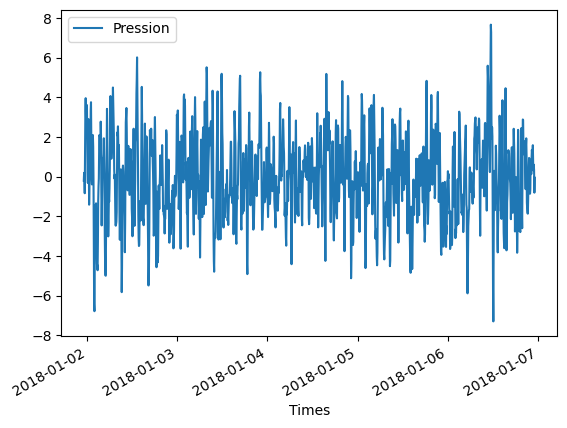

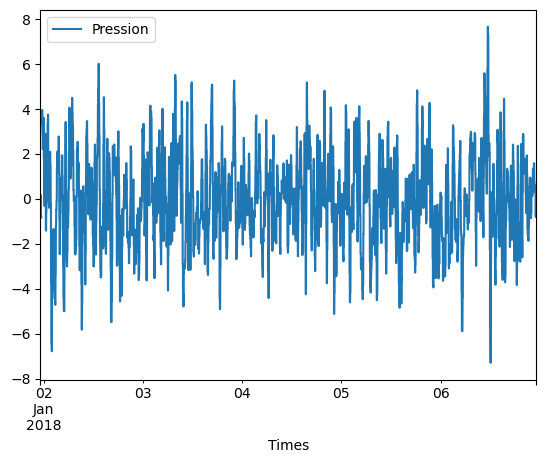

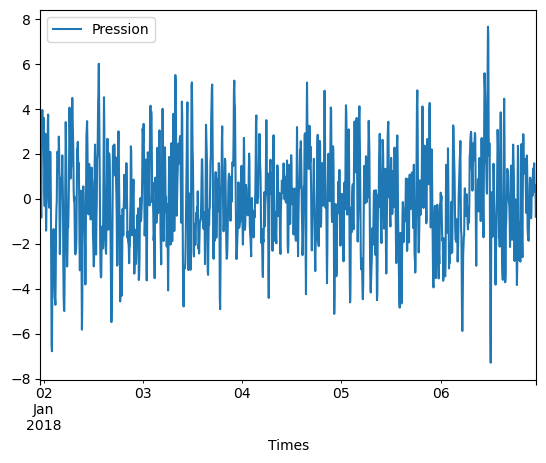

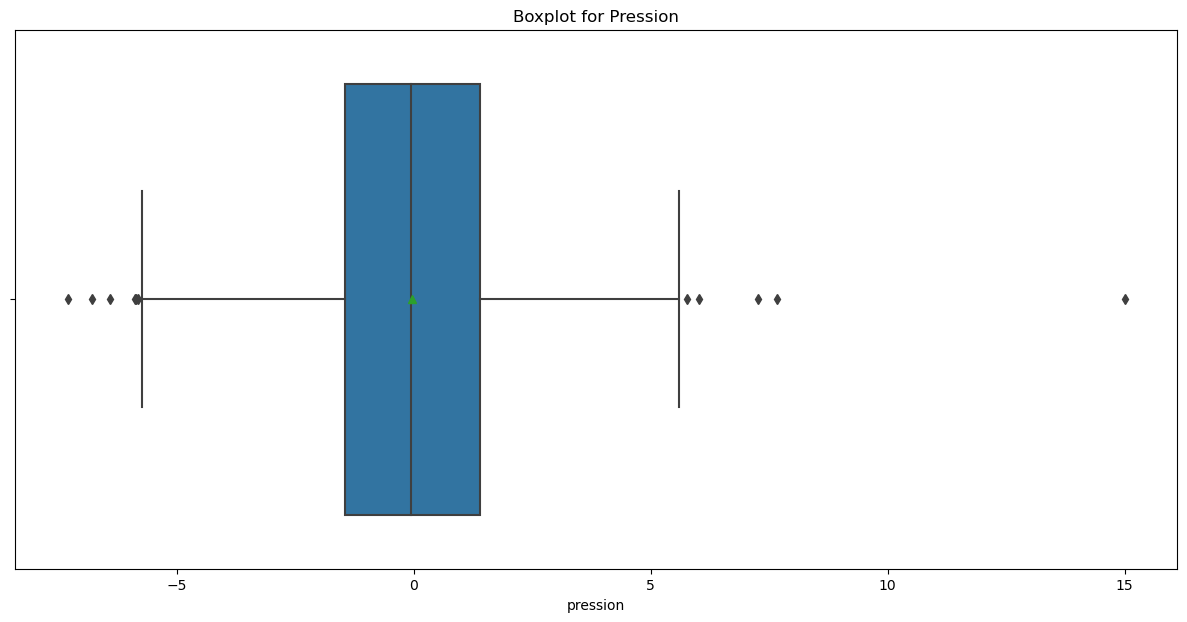

In [18]:
plt.figure(figsize=(15,7)) 
sns.boxplot(x = 'pression', data = dfOutlier, showmeans=True) 
plt.title("Boxplot for Pression") 
plt.show()

- Ne gardez que les données qui dont l' écarts types  se situent entre +3 et -3


<AxesSubplot:>

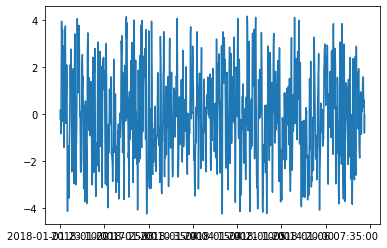

In [19]:
%matplotlib inline
df=dfOutlier[np.abs(dfOutlier['pression']-dfOutlier['pression'].mean()) <= (2*dfOutlier['pression'].std())]
df['pression'].plot()

-0.0569918234818838
0.6283184565568138


<AxesSubplot:>

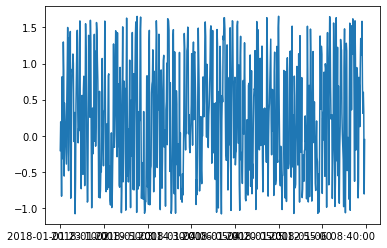

In [20]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.50)
    print(q1)
    q3 = df_in[col_name].quantile(0.63)
    print(q3)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df=remove_outlier(dfOutlier,'pression')
df['pression'].plot()

<AxesSubplot:>

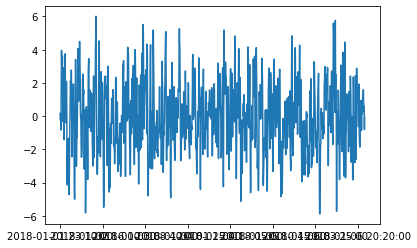

In [21]:
from scipy import stats
df=dfOutlier[(np.abs(stats.zscore(dfOutlier['pression'])) < 3)]#.all(axis=1)
df['pression'].plot()

In [22]:
def OutLier2(df):#,df,var
    #print(df)
    #Data=df.values
    #print(Data)
    #SCORE=(np.abs(stats.zscore(Data)))
    SCORE=np.abs(df.mean()) <= (2*df.std())
    #print(SCORE)
    if(SCORE):
        res=x
    else:
        res=sum(Data)
    return res


<div style="border: 2px solid #0000ff; padding: 3px; background-color: #0099FF; -moz-border-radius-topleft: 5px; -moz-border-radius-topright: 5px; -moz-border-radius-bottomright: 5px; -moz-border-radius-bottomleft: 5px;">
<center>

# A vous de jouer sur les données
<center>


Rechantllonner la série toute les minutes.

***Fonction
utilent***

- Gestion des nan
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

- Interpolation
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html